# Final Project Submission

Please fill out:
* Student name: Joseph Husney
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Introduction
In this project, we will analyze data from themoviedb3 api and use that information to shed some light on which movies are more profitable than other. This will help microsoft decide which movies to get into

In [1]:
# Import modules needed for project
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from tqdm import tqdm

In [2]:
# Allowing pandas to display all info
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 1000)

### Retrieve id's to get details about
Before analyzing the data, it must first be retrieved. Inside the package given to us, there is a file that has all the movie id's. These Id's will tell the api which movies to get data about. This code will get all the id's and put them into a list

In [3]:
df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
# print(len(df))
# print(df.columns)
movie_ids = []
for index, rows in df.iterrows():
    if int(df['release_date'][0].split('-')[0]) > 2000:
        my_list = [rows.id]
        movie_ids.append(my_list)
print(movie_ids[:20])

[[12444], [10191], [10138], [862], [27205], [32657], [19995], [10193], [20352], [38055], [863], [12155], [27578], [38757], [41439], [24021], [20504], [52371], [2502], [11324]]


In [4]:
len(movie_ids)

26517

## Retrieve all data from moviedb api
In order to retrieve all the data from the api, you need to go to the website and sign up for a unique api key. Using that and other parameters such as language, one can link into their api to get the details for the movie id's we have retrieved. 
Using a loop to change the url to get details about all the movie id's that have been retrieved.

Function to read key from file in my path

In [5]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [34]:
scrape_data = True
# Getting so far info about 5000 movies based on 1000 id's that I got from dataset I was given
# There are 26 thousand movies but it takes very long
if scrape_data:
    print("scraping file")
    movie_info = []
    keys = get_keys("/Users/joey/.secret/the_movie_db_api.json")
    api_key = keys['api_key']
    headers = {
            'Authorization': 'Bearer {}'.format(api_key)
        }

    url_params = {
                    'language':'en-US'
                }

    for id_ in tqdm(movie_ids[:1000]):
        url = f"https://api.themoviedb.org/3/movie/{id_[0]}"
        response = requests.get(url, headers=headers, params=url_params)
        movie_info.append(response.json())
    df = pd.DataFrame.from_dict(movie_info)
    df.to_csv('movie_df.csv')
else:
    df = pd.read_csv('movie_df.csv')
    print("loading file")

scraping file




  0%|                                                 | 0/1000 [00:00<?, ?it/s]

  0%|                                         | 1/1000 [00:00<06:09,  2.70it/s]

  0%|                                         | 2/1000 [00:00<04:55,  3.38it/s]

  0%|                                         | 3/1000 [00:00<04:11,  3.96it/s]

  0%|▏                                        | 4/1000 [00:00<03:34,  4.63it/s]

  0%|▏                                        | 5/1000 [00:00<03:06,  5.34it/s]

  1%|▏                                        | 6/1000 [00:01<02:48,  5.90it/s]

  1%|▎                                        | 7/1000 [00:01<02:45,  6.01it/s]

  1%|▎                                        | 8/1000 [00:01<02:35,  6.39it/s]

  1%|▎                                        | 9/1000 [00:01<02:28,  6.68it/s]

  1%|▍                                       | 10/1000 [00:01<03:41,  4.46it/s]

  1%|▍                                       | 11/1000 [00:01<03:12,  5.14it/s]

  1%|▍                    

 10%|███▉                                   | 101/1000 [00:17<03:52,  3.87it/s]

 10%|███▉                                   | 102/1000 [00:17<03:17,  4.55it/s]

 10%|████                                   | 103/1000 [00:17<02:49,  5.29it/s]

 10%|████                                   | 104/1000 [00:17<03:06,  4.81it/s]

 10%|████                                   | 105/1000 [00:18<02:47,  5.35it/s]

 11%|████▏                                  | 106/1000 [00:18<02:27,  6.07it/s]

 11%|████▏                                  | 107/1000 [00:18<02:14,  6.64it/s]

 11%|████▏                                  | 108/1000 [00:18<03:10,  4.68it/s]

 11%|████▎                                  | 109/1000 [00:18<03:18,  4.50it/s]

 11%|████▎                                  | 110/1000 [00:19<02:55,  5.06it/s]

 11%|████▎                                  | 111/1000 [00:19<02:36,  5.68it/s]

 11%|████▎                                  | 112/1000 [00:19<02:25,  6.10it/s]

 11%|████▍                  

 20%|███████▉                               | 202/1000 [00:34<01:58,  6.72it/s]

 20%|███████▉                               | 203/1000 [00:35<01:56,  6.83it/s]

 20%|███████▉                               | 204/1000 [00:35<01:56,  6.83it/s]

 20%|███████▉                               | 205/1000 [00:35<01:57,  6.74it/s]

 21%|████████                               | 206/1000 [00:35<01:52,  7.04it/s]

 21%|████████                               | 207/1000 [00:35<01:47,  7.39it/s]

 21%|████████                               | 208/1000 [00:35<01:46,  7.47it/s]

 21%|████████▏                              | 209/1000 [00:35<01:44,  7.59it/s]

 21%|████████▏                              | 210/1000 [00:35<01:41,  7.80it/s]

 21%|████████▏                              | 211/1000 [00:36<01:41,  7.76it/s]

 21%|████████▎                              | 212/1000 [00:36<01:41,  7.80it/s]

 21%|████████▎                              | 213/1000 [00:36<01:57,  6.67it/s]

 21%|████████▎              

 30%|███████████▊                           | 303/1000 [00:51<02:09,  5.36it/s]

 30%|███████████▊                           | 304/1000 [00:51<02:11,  5.30it/s]

 30%|███████████▉                           | 305/1000 [00:52<02:38,  4.39it/s]

 31%|███████████▉                           | 306/1000 [00:52<02:29,  4.63it/s]

 31%|███████████▉                           | 307/1000 [00:52<02:29,  4.62it/s]

 31%|████████████                           | 308/1000 [00:52<02:17,  5.04it/s]

 31%|████████████                           | 309/1000 [00:52<02:15,  5.10it/s]

 31%|████████████                           | 310/1000 [00:53<02:28,  4.65it/s]

 31%|████████████▏                          | 311/1000 [00:53<02:28,  4.65it/s]

 31%|████████████▏                          | 312/1000 [00:53<02:25,  4.74it/s]

 31%|████████████▏                          | 313/1000 [00:53<02:20,  4.88it/s]

 31%|████████████▏                          | 314/1000 [00:54<02:33,  4.48it/s]

 32%|████████████▎          

 40%|███████████████▊                       | 404/1000 [01:08<02:07,  4.69it/s]

 40%|███████████████▊                       | 405/1000 [01:08<01:50,  5.38it/s]

 41%|███████████████▊                       | 406/1000 [01:08<01:38,  6.04it/s]

 41%|███████████████▊                       | 407/1000 [01:09<01:28,  6.68it/s]

 41%|███████████████▉                       | 408/1000 [01:09<01:24,  7.04it/s]

 41%|███████████████▉                       | 409/1000 [01:09<01:21,  7.23it/s]

 41%|███████████████▉                       | 410/1000 [01:09<01:19,  7.45it/s]

 41%|████████████████                       | 411/1000 [01:09<01:18,  7.46it/s]

 41%|████████████████                       | 412/1000 [01:09<01:19,  7.37it/s]

 41%|████████████████                       | 413/1000 [01:09<01:20,  7.27it/s]

 41%|████████████████▏                      | 414/1000 [01:09<01:18,  7.47it/s]

 42%|████████████████▏                      | 415/1000 [01:10<01:18,  7.44it/s]

 42%|████████████████▏      

 50%|███████████████████▋                   | 505/1000 [01:23<01:06,  7.48it/s]

 51%|███████████████████▋                   | 506/1000 [01:23<01:04,  7.60it/s]

 51%|███████████████████▊                   | 507/1000 [01:23<01:05,  7.55it/s]

 51%|███████████████████▊                   | 508/1000 [01:24<01:05,  7.53it/s]

 51%|███████████████████▊                   | 509/1000 [01:24<01:17,  6.34it/s]

 51%|███████████████████▉                   | 510/1000 [01:24<01:12,  6.76it/s]

 51%|███████████████████▉                   | 511/1000 [01:24<01:18,  6.22it/s]

 51%|███████████████████▉                   | 512/1000 [01:24<01:18,  6.22it/s]

 51%|████████████████████                   | 513/1000 [01:25<03:40,  2.21it/s]

 51%|████████████████████                   | 514/1000 [01:26<03:14,  2.49it/s]

 52%|████████████████████                   | 515/1000 [01:26<02:35,  3.12it/s]

 52%|████████████████████                   | 516/1000 [01:26<02:09,  3.74it/s]

 52%|████████████████████▏  

 61%|███████████████████████▋               | 606/1000 [01:39<00:57,  6.86it/s]

 61%|███████████████████████▋               | 607/1000 [01:39<00:56,  6.98it/s]

 61%|███████████████████████▋               | 608/1000 [01:39<00:55,  7.00it/s]

 61%|███████████████████████▊               | 609/1000 [01:40<00:55,  7.03it/s]

 61%|███████████████████████▊               | 610/1000 [01:40<00:55,  7.06it/s]

 61%|███████████████████████▊               | 611/1000 [01:40<00:54,  7.15it/s]

 61%|███████████████████████▊               | 612/1000 [01:40<00:52,  7.39it/s]

 61%|███████████████████████▉               | 613/1000 [01:40<00:50,  7.62it/s]

 61%|███████████████████████▉               | 614/1000 [01:40<01:08,  5.66it/s]

 62%|███████████████████████▉               | 615/1000 [01:40<01:04,  6.01it/s]

 62%|████████████████████████               | 616/1000 [01:41<00:58,  6.59it/s]

 62%|████████████████████████               | 617/1000 [01:41<00:55,  6.92it/s]

 62%|███████████████████████

 71%|███████████████████████████▌           | 707/1000 [01:54<00:40,  7.24it/s]

 71%|███████████████████████████▌           | 708/1000 [01:54<00:48,  6.07it/s]

 71%|███████████████████████████▋           | 709/1000 [01:54<00:48,  6.00it/s]

 71%|███████████████████████████▋           | 710/1000 [01:54<00:45,  6.31it/s]

 71%|███████████████████████████▋           | 711/1000 [01:54<00:44,  6.43it/s]

 71%|███████████████████████████▊           | 712/1000 [01:54<00:42,  6.77it/s]

 71%|███████████████████████████▊           | 713/1000 [01:55<00:41,  6.97it/s]

 71%|███████████████████████████▊           | 714/1000 [01:55<00:39,  7.24it/s]

 72%|███████████████████████████▉           | 715/1000 [01:55<00:37,  7.56it/s]

 72%|███████████████████████████▉           | 716/1000 [01:55<00:36,  7.78it/s]

 72%|███████████████████████████▉           | 717/1000 [01:55<00:36,  7.71it/s]

 72%|████████████████████████████           | 718/1000 [01:55<00:42,  6.58it/s]

 72%|███████████████████████

 81%|███████████████████████████████▌       | 808/1000 [02:09<00:27,  7.11it/s]

 81%|███████████████████████████████▌       | 809/1000 [02:09<00:25,  7.36it/s]

 81%|███████████████████████████████▌       | 810/1000 [02:10<00:31,  6.01it/s]

 81%|███████████████████████████████▋       | 811/1000 [02:10<00:29,  6.48it/s]

 81%|███████████████████████████████▋       | 812/1000 [02:10<00:27,  6.96it/s]

 81%|███████████████████████████████▋       | 813/1000 [02:10<00:25,  7.34it/s]

 81%|███████████████████████████████▋       | 814/1000 [02:10<00:24,  7.71it/s]

 82%|███████████████████████████████▊       | 815/1000 [02:10<00:23,  7.97it/s]

 82%|███████████████████████████████▊       | 816/1000 [02:10<00:23,  7.89it/s]

 82%|███████████████████████████████▊       | 817/1000 [02:11<00:28,  6.31it/s]

 82%|███████████████████████████████▉       | 818/1000 [02:11<00:26,  6.85it/s]

 82%|███████████████████████████████▉       | 819/1000 [02:11<00:25,  7.14it/s]

 82%|███████████████████████

 91%|███████████████████████████████████▍   | 909/1000 [02:24<00:11,  7.60it/s]

 91%|███████████████████████████████████▍   | 910/1000 [02:24<00:11,  7.85it/s]

 91%|███████████████████████████████████▌   | 911/1000 [02:24<00:11,  7.86it/s]

 91%|███████████████████████████████████▌   | 912/1000 [02:24<00:11,  7.84it/s]

 91%|███████████████████████████████████▌   | 913/1000 [02:24<00:14,  6.08it/s]

 91%|███████████████████████████████████▋   | 914/1000 [02:24<00:14,  6.03it/s]

 92%|███████████████████████████████████▋   | 915/1000 [02:25<00:18,  4.61it/s]

 92%|███████████████████████████████████▋   | 916/1000 [02:25<00:15,  5.32it/s]

 92%|███████████████████████████████████▊   | 917/1000 [02:25<00:14,  5.70it/s]

 92%|███████████████████████████████████▊   | 918/1000 [02:25<00:13,  6.14it/s]

 92%|███████████████████████████████████▊   | 919/1000 [02:25<00:12,  6.59it/s]

 92%|███████████████████████████████████▉   | 920/1000 [02:25<00:11,  7.04it/s]

 92%|███████████████████████

Once we have retrieved all the details for these movies, we will analyze it through the lens of a pandas dataframe

In [37]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,status_code,status_message
0,False,/lntukFCBAd1CPSKfLocYWu1uIMx.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",250000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,12444.0,tt0926084,en,Harry Potter and the Deathly Hallows: Part 1,...,146.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One Way… One Fate… One Hero.,Harry Potter and the Deathly Hallows: Part 1,False,7.8,13146.0,NaN,NaN
1,False,/kxklJL1v8MYEU5xdU6W5VvmBwVz.jpg,"{'id': 89137, 'name': 'How to Train Your Drago...",165000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",http://www.howtotrainyourdragon.com/,10191.0,tt0892769,en,How to Train Your Dragon,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One adventure will change two worlds,How to Train Your Dragon,False,7.8,9207.0,NaN,NaN
2,False,/hCVQPB77eXBGh9abVdrWtKpKgkN.jpg,"{'id': 131292, 'name': 'Iron Man Collection', ...",200000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/iron-man-2,10138.0,tt1228705,en,Iron Man 2,...,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"It's not the armor that makes the hero, but th...",Iron Man 2,False,6.8,14759.0,NaN,NaN
3,False,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.9,12732.0,NaN,NaN
4,False,/s3TBrRGB1iav7gFOCNx3H31MoES.jpg,None,160000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://inceptionmovie.warnerbros.com/,27205.0,tt1375666,en,Inception,...,148.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Your mind is the scene of the crime.,Inception,False,8.3,26672.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,None,None,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190.0,tt2700330,en,The Two Escobars,...,100.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.5,27.0,NaN,NaN
996,False,None,None,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://www.nightbeasts.com/Home.html,248670.0,tt1513835,en,Nightbeasts,...,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They come out at night. . .,Nightbeasts,False,3.5,4.0,NaN,NaN
997,False,None,None,0.0,"[{'id': 35, 'name': 'Comedy'}]",,43814.0,tt1103255,en,Something Like A Business,...,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's hard out there for a pimp,Something Like A Business,False,3.5,6.0,NaN,NaN
998,False,None,None,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",,39050.0,tt1616512,en,Meadowoods,...,88.0,[],Released,"In a sleepy and uneventful small town, three c...",Meadowoods,False,4.9,7.0,NaN,NaN


## Data Cleaning
Upon inspecting the data, it became clear that there are many movies missing certain important data points. For instance, some movies don't have genre data. Others have a budget and/or revenue of zero. Here we will clean up the data by deleting those rows from the dataframe.

### Get rid of rows without genre data

In [38]:
df = df[~df['genres'].isna()]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 27 columns):
adult                    998 non-null object
backdrop_path            644 non-null object
belongs_to_collection    144 non-null object
budget                   998 non-null float64
genres                   998 non-null object
homepage                 998 non-null object
id                       998 non-null float64
imdb_id                  998 non-null object
original_language        998 non-null object
original_title           998 non-null object
overview                 998 non-null object
popularity               998 non-null float64
poster_path              958 non-null object
production_companies     998 non-null object
production_countries     998 non-null object
release_date             998 non-null object
revenue                  998 non-null float64
runtime                  998 non-null float64
spoken_languages         998 non-null object
status                   998 non-nu

### Get rid of rows with budget or revenue of zero

In [40]:
df[ df['budget'] == 0 ]

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,status_code,status_message
17,False,None,None,0.0,"[{'id': 10402, 'name': 'Music'}, {'id': 10749,...",http://sites.bnn.nl/page/overbnn/lellebelle,52371.0,tt1705118,nl,LelleBelle,...,90.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,,LelleBelle,False,4.9,50.0,NaN,NaN
48,False,/irdYvAx7UwW8lvdkZWCLtdry07c.jpg,"{'id': 315595, 'name': 'Tinker Bell Collection...",0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://disneydvd.disney.go.com/tinker-bell-and...,44683.0,tt1216515,en,Tinker Bell and the Great Fairy Rescue,...,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Tinker Bell and the Great Fairy Rescue,False,6.5,558.0,NaN,NaN
49,False,/tBIUBCP6x5rOSyvytX2oVSp1gQ9.jpg,"{'id': 141649, 'name': 'Three Steps Above Heav...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.3msc.es,61979.0,tt1648216,es,Tres metros sobre el cielo,...,122.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,Have you ever been about to touch the sky?,Three Steps Above Heaven,False,7.7,1539.0,NaN,NaN
62,False,None,"{'id': 141748, 'name': 'Robot Chicken: Star Wa...",0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",,51888.0,tt1691338,en,Robot Chicken: Star Wars Episode III,...,45.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Robot Chicken: Star Wars Episode III,False,7.4,83.0,NaN,NaN
64,False,/vkBMhUSaDUk3JUCS2VUk160IXMM.jpg,None,0.0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 16,...",,47626.0,tt1744776,en,Legend of the BoneKnapper Dragon,...,16.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An All-New Dragon Adventure,Legend of the BoneKnapper Dragon,False,6.5,143.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,None,None,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name...",http://www.the2escobars.com,53190.0,tt2700330,en,The Two Escobars,...,100.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,Sometimes it really is a matter of life and de...,The Two Escobars,False,7.5,27.0,NaN,NaN
996,False,None,None,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",http://www.nightbeasts.com/Home.html,248670.0,tt1513835,en,Nightbeasts,...,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They come out at night. . .,Nightbeasts,False,3.5,4.0,NaN,NaN
997,False,None,None,0.0,"[{'id': 35, 'name': 'Comedy'}]",,43814.0,tt1103255,en,Something Like A Business,...,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It's hard out there for a pimp,Something Like A Business,False,3.5,6.0,NaN,NaN
998,False,None,None,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",,39050.0,tt1616512,en,Meadowoods,...,88.0,[],Released,"In a sleepy and uneventful small town, three c...",Meadowoods,False,4.9,7.0,NaN,NaN


In [41]:
indexNames = df[ df['budget'] == 0 ].index
df.drop(indexNames , inplace=True)


indexNames = df[ df['revenue'] == 0 ].index
df.drop(indexNames , inplace=True)

C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,status_code,status_message
0,False,/lntukFCBAd1CPSKfLocYWu1uIMx.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",250000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,12444.0,tt0926084,en,Harry Potter and the Deathly Hallows: Part 1,...,146.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One Way… One Fate… One Hero.,Harry Potter and the Deathly Hallows: Part 1,False,7.8,13146.0,NaN,NaN
1,False,/kxklJL1v8MYEU5xdU6W5VvmBwVz.jpg,"{'id': 89137, 'name': 'How to Train Your Drago...",165000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",http://www.howtotrainyourdragon.com/,10191.0,tt0892769,en,How to Train Your Dragon,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One adventure will change two worlds,How to Train Your Dragon,False,7.8,9207.0,NaN,NaN
2,False,/hCVQPB77eXBGh9abVdrWtKpKgkN.jpg,"{'id': 131292, 'name': 'Iron Man Collection', ...",200000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/iron-man-2,10138.0,tt1228705,en,Iron Man 2,...,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"It's not the armor that makes the hero, but th...",Iron Man 2,False,6.8,14759.0,NaN,NaN
3,False,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,Toy Story,False,7.9,12732.0,NaN,NaN
4,False,/s3TBrRGB1iav7gFOCNx3H31MoES.jpg,None,160000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://inceptionmovie.warnerbros.com/,27205.0,tt1375666,en,Inception,...,148.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Your mind is the scene of the crime.,Inception,False,8.3,26672.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,False,None,None,5600000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,29888.0,tt1182884,hi,दुल्हा मिल गया,...,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,Dulha Mil Gaya,False,5.1,24.0,NaN,NaN
811,False,/9We4Yg6vR9j6N5EQAOCInCHXeGz.jpg,None,6000000.0,"[{'id': 18, 'name': 'Drama'}]",http://the5thquartermovie.com/,59728.0,tt1130964,en,The 5th Quarter,...,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Rising from tragedy to triumph,The 5th Quarter,False,4.8,18.0,NaN,NaN
853,False,None,None,2745000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 36, 'nam...",http://www.mako.co.il/sdom/,43083.0,tt1675197,he,זוהי סדום,...,88.0,"[{'iso_639_1': 'he', 'name': 'עִבְרִית'}]",Released,,This Is Sodom,False,7.0,15.0,NaN,NaN
957,False,/sRpnFcvAsA0AuHKCEFSEbHapQKa.jpg,None,2000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",,63281.0,tt1718881,ru,Про любоff,...,107.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,,Pro Lyuboff,False,4.0,4.0,NaN,NaN


## Now we will discuss four questions that will shed some light on which movies microsoft should invest in

### Question 1: What is the *domestic* average gross profit margin categorized by movie genre?

In [43]:
def seperate_genres(genre_list):
    genres = []
    for genre in genre_list:
            genres.append(genre['name'])
    return genres

In [44]:
len(df['genres'])

242

In [45]:
df['genres'].isna().sum()

0

In [46]:
df['genre'] = df['genres'].map(seperate_genres)

C:\Users\Joey\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
genre_df_explode = df.explode('genre')

In [48]:
genre_df_explode['profit'] = genre_df_explode['revenue'] - genre_df_explode['budget']

In [49]:
genre_df_explode['profit_margin'] = (genre_df_explode['profit'] / genre_df_explode['budget'])*100

In [50]:
genre_df_explode[['title','budget','revenue', 'profit','profit_margin']].head()

,title,budget,revenue,profit,profit_margin
0,Harry Potter and the Deathly Hallows: Part 1,250000000.0,954305868.0,704305868.0,281.722347
0,Harry Potter and the Deathly Hallows: Part 1,250000000.0,954305868.0,704305868.0,281.722347
1,How to Train Your Dragon,165000000.0,494878759.0,329878759.0,199.926521
1,How to Train Your Dragon,165000000.0,494878759.0,329878759.0,199.926521
1,How to Train Your Dragon,165000000.0,494878759.0,329878759.0,199.926521


In [51]:
genre_df_explode.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'status_code', 'status_message', 'genre',
       'profit', 'profit_margin'],
      dtype='object')

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Percent Profit Margin')]

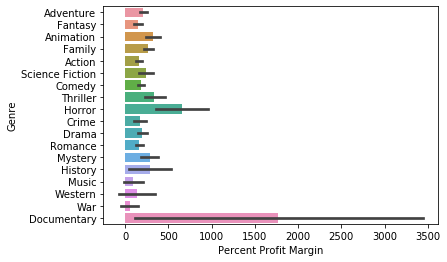

In [53]:
fig = sns.barplot(y= 'genre', x='profit_margin', data=genre_df_explode, ci=68)
fig.set(xlabel='Percent Profit Margin', ylabel='Genre')

### Question 2: What is the optimal runtime for domestic movies?

In [63]:
df_runtime = df.copy()

In [64]:
df_runtime['profit'] = df_runtime['revenue'] - df_runtime['budget']
df_runtime['profit_margin'] = (df_runtime['profit'] / df_runtime['budget'])*100

In [65]:
df_runtime

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,tagline,title,video,vote_average,vote_count,status_code,status_message,genre,profit,profit_margin
0,False,/lntukFCBAd1CPSKfLocYWu1uIMx.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",250000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,12444.0,tt0926084,en,Harry Potter and the Deathly Hallows: Part 1,...,One Way… One Fate… One Hero.,Harry Potter and the Deathly Hallows: Part 1,False,7.8,13146.0,NaN,NaN,"[Adventure, Fantasy]",704305868.0,281.722347
1,False,/kxklJL1v8MYEU5xdU6W5VvmBwVz.jpg,"{'id': 89137, 'name': 'How to Train Your Drago...",165000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",http://www.howtotrainyourdragon.com/,10191.0,tt0892769,en,How to Train Your Dragon,...,One adventure will change two worlds,How to Train Your Dragon,False,7.8,9207.0,NaN,NaN,"[Fantasy, Adventure, Animation, Family]",329878759.0,199.926521
2,False,/hCVQPB77eXBGh9abVdrWtKpKgkN.jpg,"{'id': 131292, 'name': 'Iron Man Collection', ...",200000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/iron-man-2,10138.0,tt1228705,en,Iron Man 2,...,"It's not the armor that makes the hero, but th...",Iron Man 2,False,6.8,14759.0,NaN,NaN,"[Adventure, Action, Science Fiction]",423933331.0,211.966666
3,False,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,...,,Toy Story,False,7.9,12732.0,NaN,NaN,"[Animation, Comedy, Family]",343554033.0,1145.180110
4,False,/s3TBrRGB1iav7gFOCNx3H31MoES.jpg,None,160000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://inceptionmovie.warnerbros.com/,27205.0,tt1375666,en,Inception,...,Your mind is the scene of the crime.,Inception,False,8.3,26672.0,NaN,NaN,"[Action, Science Fiction, Adventure]",665532764.0,415.957978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,False,None,None,5600000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,29888.0,tt1182884,hi,दुल्हा मिल गया,...,,Dulha Mil Gaya,False,5.1,24.0,NaN,NaN,"[Comedy, Drama, Romance]",-2900000.0,-51.785714
811,False,/9We4Yg6vR9j6N5EQAOCInCHXeGz.jpg,None,6000000.0,"[{'id': 18, 'name': 'Drama'}]",http://the5thquartermovie.com/,59728.0,tt1130964,en,The 5th Quarter,...,Rising from tragedy to triumph,The 5th Quarter,False,4.8,18.0,NaN,NaN,[Drama],-5600389.0,-93.339817
853,False,None,None,2745000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 36, 'nam...",http://www.mako.co.il/sdom/,43083.0,tt1675197,he,זוהי סדום,...,,This Is Sodom,False,7.0,15.0,NaN,NaN,"[Comedy, History]",3105000.0,113.114754
957,False,/sRpnFcvAsA0AuHKCEFSEbHapQKa.jpg,None,2000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",,63281.0,tt1718881,ru,Про любоff,...,,Pro Lyuboff,False,4.0,4.0,NaN,NaN,"[Romance, Drama]",-731207.0,-36.560350


In [68]:
fig = sns.distplot(y= 'runtime', x='profit_margin', data=df_runtime, ci=68)

TypeError: distplot() got an unexpected keyword argument 'y'